In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.8.0'

In [7]:
!mkdir mnist_data

In [21]:
from tensorflow.examples.tutorials.mnist import input_data

In [22]:
mnist = input_data.read_data_sets("mnist_data/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [24]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [26]:
mnist.train.num_examples

55000

## Step 2: Visualizing the data

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
mnist.train.images.shape

(55000, 784)

In [31]:
mnist.train.images[400]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [51]:
my_img = mnist.train.images[400].reshape(28,28)

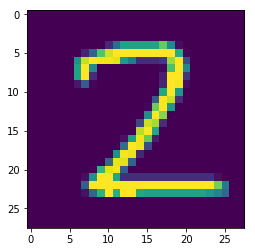

In [52]:
plt.imshow(my_img)

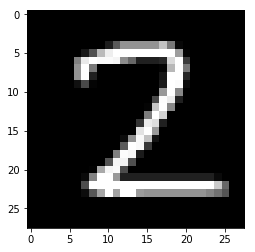

In [53]:
plt.imshow(my_img, cmap="gist_gray")

In [54]:
my_img.min()

0.0

In [55]:
my_img.max()

0.99607849

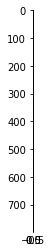

In [58]:
plt.imshow(mnist.train.images[1].reshape(784,1))

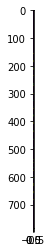

In [60]:
plt.imshow(mnist.train.images[1].reshape(784,1),aspect=0.5)

## Create the model

1. **Placeholders** : we create placeholders which will essentially be out X.
2. **Variables**
3. **Create graph operations**
4. **Loss Function**
5. **Optimizer**
6. **Create and run the session**

In [61]:
X = tf.placeholder(tf.float32, shape=[None, 784])

In [62]:
# Variables
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros(10))


In [63]:
# Create a graph
y = tf.matmul(X,W) + b

In [65]:
# true label placeholder
y_true = tf.placeholder(tf.float32, [None, 10])

In [69]:
# loss and optimizer
# cross entropy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))


In [116]:
#optimizer
#optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.3)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

In [117]:
# we need to minimize the cost
train = optimizer.minimize(cross_entropy)

In [118]:
# create the session 
init = tf.global_variables_initializer()

In [122]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(100000):
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict={X:batch_x, y_true:batch_y})
        
    #evaluate the model 
    prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
    
    print(sess.run(accuracy, feed_dict={X:mnist.test.images, y_true:mnist.test.labels}))

0.925
